# Extração de texto em relatórios da Fundação ABC - Experimento

TODO:
* Aplicar filtros nesta etapa

### **Em caso de dúvidas, consulte os [tutoriais da PlatIAgro](https://platiagro.github.io/tutorials/).**

## Declaração de parâmetros e hiperparâmetros

Declare parâmetros com o botão  na barra de ferramentas.<br>
A variável `dataset` possui o caminho para leitura do arquivos importados na tarefa de "Upload de dados".<br>
Você também pode importar arquivos com o botão  na barra de ferramentas.

In [1]:
dataset = "/tmp/data/fabc_reports-10.zip" #@param {type:"string"}
doc_id = True #@param {type:"boolean",label:"Id documento - Deployment",descrition:"Retorna coluna com os ids dos documentos em Deployment"}
report_name = True #@param {type:"boolean",label:"Nome relatório - Deployment",descrition:"Retorna coluna com o nome dos relatórios em Deployment"}
section_name = True #@param {type:"boolean",label:"Nome da seção relatórios - Deployment",descrition:"Retorna coluna com o nome das seções dos relatórios em Deployment"}
context = True #@param {type:"boolean",label:"Contexto - Deployment",descrition:"Retorna coluna de texto em Deployment"}
apply_filers = True #@param {type:"boolean",label:"Aplicar Filtros",descrition:"Aplicar filtros especiais nos contextos extraídos dos relatórios"}
keep_only_conclusions = True #@param {type:"boolean",label:"Maneter apenas conclusões",descrition:"Mantém apenas as conclusões. Apenas válido se apply_filers=True"}
#section_names_to_keep = ["Capítulo 6","Capitulo 6"] #@param ["Capítulo 6","Capitulo 6"] {type:"feature",multiple:true,label:"Seções para manter",descrition:"Mantém apenas as seções que tenham os nomes especificados. Apenas válido se apply_filers=True"}
min_context_length_in_tokens = 20 #@param {type:"integer",label:"Número mínimo de token de um contexto",descrition:"Utilizado para eliminar contextos que provavelmente representam erros de extração. Apenas válido se apply_filers=True"}

In [2]:
columns = {"doc_id":doc_id,"report_name":report_name,"section_name":section_name,"context":context}

## Leitura do conjunto de dados

O exemplo abaixo faz a leitura de dados tabulares (ex: .csv).<br>
Modifique o código de acordo com o tipo de dado que desejar ler.

In [3]:
folder = dataset.split('.')[0]

In [4]:
!mkdir -p {folder}
!unzip -o {dataset} -d {folder}

Archive:  /tmp/data/fabc_reports-10.zip
  inflating: /tmp/data/fabc_reports-10/fabc_reports/HB17FE01 - Seletividade dos herbicidas Gamit 360 CS, Stone, Pacto e Dual Gold aplicados na pre-emergencia.pdf  
  inflating: /tmp/data/fabc_reports-10/fabc_reports/HA17FE02 - Seletividade dos herbicidas Gamit 360 CS, Stone, Pacto e Dual Gold aplicados na pre-emergencia.pdf  
  inflating: /tmp/data/fabc_reports-10/fabc_reports/HB19PR_SO04 (UPL) - Seletividade dos herbicidas imazethapyr diclosulam sulfentrazone saflufenacil e s-metolachlor aplicados na pre-emergencia de cultivares de soja.pdf  
  inflating: /tmp/data/fabc_reports-10/fabc_reports/HB19PR_MI13.pdf  
  inflating: /tmp/data/fabc_reports-10/fabc_reports/HB19PR_MI12.pdf  
  inflating: /tmp/data/fabc_reports-10/fabc_reports/HB19PR_MI12.txt  
  inflating: /tmp/data/fabc_reports-10/fabc_reports/HT18CE05 - Seletividade de herbicidas inibidores da ACCase inibidores da ALS e mimetizadores de auxina aplicados na pos-emergencia das diferentes cu

## Conteúdo da tarefa

In [6]:
import os
from aux_functions import get_reports_as_dataframe,filter_post_content

data_dir = "/tmp/data"
reports_dir = os.path.join(data_dir, folder.split("/")[-1])
df = get_reports_as_dataframe(reports_dir=reports_dir,columns_dict = columns)
df = filter_post_content(df = df,
                         keep_only_conclusions = keep_only_conclusions,
                         min_context_length_in_tokens = min_context_length_in_tokens)

## Visualizando os resultados

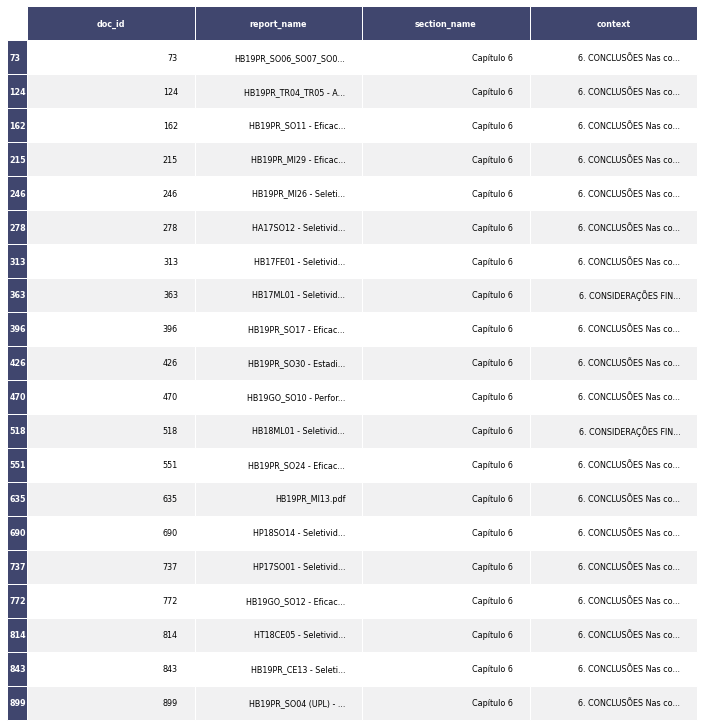

In [7]:
import matplotlib.pyplot as plt
from platiagro.plotting import plot_data_table
ax = plot_data_table(df)
plt.show()

In [11]:
#df.to_csv(f"{reports_dir}.csv", index=False)
df.to_csv("fabc_reports.csv", index=False)

## Salva resultados da tarefa

A plataforma guarda o conteúdo de `/tmp/data/` para as tarefas subsequentes.<br>
Use essa pasta para salvar modelos, metadados e outros resultados.

In [12]:
from joblib import dump

artifacts = {
    "df": df,
    "columns":columns,
    "reports_dir":reports_dir,
    "keep_only_conclusions": keep_only_conclusions,
    "min_context_length_in_tokens": min_context_length_in_tokens,
}

dump(artifacts, "/tmp/data/fabc_reports.joblib")

['/tmp/data/fabc_reports.joblib']